<a href="https://colab.research.google.com/github/baggelisp/Predicting-next-days-COVID-19-cases/blob/master/PREDICTING_COVID_CASES_COLAB_NOTEBOOK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data from CSSE COVID-19 Dataset
https://github.com/CSSEGISandData/COVID-19 

# 1. Visualizing And Preprocessing of Data

In [0]:
# importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
np.set_printoptions(suppress=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Load Data from CSSEGISandData
# Data is updating every day

In [0]:
covid19_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df_confirmed = pd.read_csv(covid19_confirmed, error_bad_lines=False)
df_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1
260,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,3,4,4
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4


In [0]:
covid19_deaths = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
df_deaths = pd.read_csv(covid19_deaths, error_bad_lines=False)
df_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4,4,4,4,4,4,4,6,6,7,7,11,14,14,15,15,18
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5,5,6,8,10,10,11,15,15,16,17,20,20,21,22,22,23,23,23
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19,21,25,26,29,31,35,44,58,86,105,130,152,173,193,205,235,256,275
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,3,6,8,12,14,15,16,17,18,21,22,23,25,26,26
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
260,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
covid19_recovered = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
df_recovered = pd.read_csv(covid19_recovered, error_bad_lines=False)
df_recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,5,5,10,10,10,15,18,18,29,32,32,32
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,10,17,17,31,31,33,44,52,67,76,89,99,104,116,131,154,165,182,197
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8,8,12,12,12,12,12,32,32,32,65,65,24,65,29,29,31,31,37,46,61,61,62,90,90,90,113,237,347,405,460
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,10,10,10,10,16,21,26,31,39,52,58,71,71
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,2,2,2,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
246,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
247,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
248,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 1.1 Preprocessing COVID-19 cases

In [0]:
def process_data(dataFrame, labelName):
  del dataFrame['Lat']
  del dataFrame['Long']
  df = dataFrame.groupby('Country/Region').sum()
  df = df.stack().reset_index()
  df = df.rename(columns={'level_1': 'Date', 0: labelName})
  return df

In [0]:
df_confirmed = process_data(df_confirmed, 'Confirmed')
df_recovered = process_data(df_recovered , 'Recovered')
df_deaths = process_data(df_deaths, 'Deaths')

In [0]:
df_confirmed.head()

,Country/Region,Date,Confirmed
0,Afghanistan,1/22/20,0
1,Afghanistan,1/23/20,0
2,Afghanistan,1/24/20,0
3,Afghanistan,1/25/20,0
4,Afghanistan,1/26/20,0


In [0]:
df_all = pd.merge(df_confirmed, df_recovered,  how='inner', left_on=['Country/Region','Date'], right_on = ['Country/Region','Date'])


In [0]:
df_all = pd.merge(df_all, df_deaths,  how='inner', left_on=['Country/Region','Date'], right_on = ['Country/Region','Date'])


In [0]:
df_all.head()

,Country/Region,Date,Confirmed,Recovered,Deaths
0,Afghanistan,1/22/20,0,0,0
1,Afghanistan,1/23/20,0,0,0
2,Afghanistan,1/24/20,0,0,0
3,Afghanistan,1/25/20,0,0,0
4,Afghanistan,1/26/20,0,0,0


In [0]:
df_all.groupby('Date').sum().reset_index().head()

,Date,Confirmed,Recovered,Deaths
0,1/22/20,555,28,17
1,1/23/20,654,30,18
2,1/24/20,941,36,26
3,1/25/20,1434,39,42
4,1/26/20,2118,52,56


## 1.2 Visualizing COVID-19 cases


In [0]:
df_all_by_date = df_all.groupby('Date').sum().reset_index()

In [0]:
def sord_df_by_date(df):
  df['Date']=pd.to_datetime(df['Date'])
  df = df.sort_values(by='Date')
  return df


In [0]:
df_all_by_date = sord_df_by_date(df_all_by_date)

In [0]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_all_by_date['Date'], y=df_all_by_date['Confirmed'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=df_all_by_date['Date'], y=df_all_by_date['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=df_all_by_date['Date'], y=df_all_by_date['Recovered'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
fig.update_layout(title='Worldwide NCOVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))
fig.show()

In [0]:
def visualize_single_country(Country_name):
  def_temp = df_all.loc[df_all['Country/Region'] == Country_name]
  def_temp_by_date = def_temp.groupby('Date').sum().reset_index()
  def_temp_by_date = sord_df_by_date(def_temp_by_date)
  fig = go.Figure()
  fig.add_trace(go.Scatter(x=def_temp_by_date['Date'], y=def_temp_by_date['Confirmed'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
  fig.add_trace(go.Scatter(x=def_temp_by_date['Date'], y=def_temp_by_date['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
  fig.add_trace(go.Scatter(x=def_temp_by_date['Date'], y=def_temp_by_date['Recovered'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
  fig.update_layout(title=Country_name + ' NCOVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))

  fig.show()


In [0]:
visualize_single_country('Greece')

# 2. Predicting Algorithms


## 2.1 Predict with Prophet

In [0]:
from fbprophet import Prophet

In [0]:
df_all_by_date

,Date,Confirmed,Recovered,Deaths
0,2020-01-22,555,28,17
1,2020-01-23,654,30,18
2,2020-01-24,941,36,26
3,2020-01-25,1434,39,42
4,2020-01-26,2118,52,56
...,...,...,...,...
78,2020-04-07,1426096,300054,81865
79,2020-04-08,1511104,328661,88338
80,2020-04-09,1595350,353975,95455
71,2020-04-10,1691719,376096,102525


In [0]:
confirmed = df_all_by_date.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df_all_by_date.groupby('Date').sum()['Deaths'].reset_index()
recovered = df_all_by_date.groupby('Date').sum()['Recovered'].reset_index()

In [0]:
def predict_with_prophet(df):
  df.columns = ['ds','y']
  df['ds'] = pd.to_datetime(df['ds'])
  model = Prophet(interval_width=0.95)
  model.fit(df)
  future = model.make_future_dataframe(periods=7)
  #predicting the future with date, and upper and lower limit of y value
  forecast = model.predict(future)
  model.plot(forecast)


INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


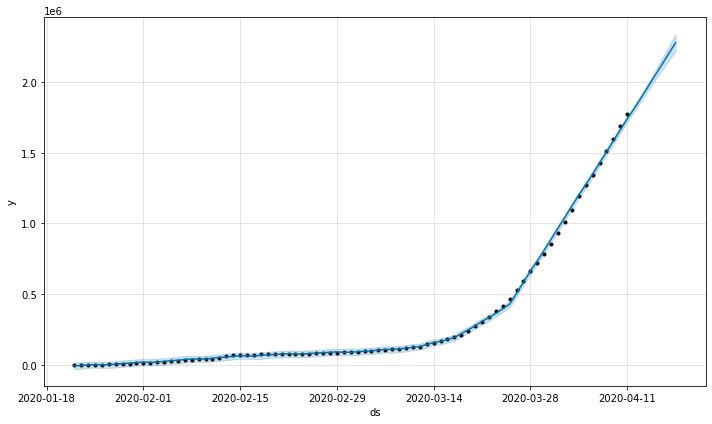

In [0]:
predict_with_prophet(confirmed)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


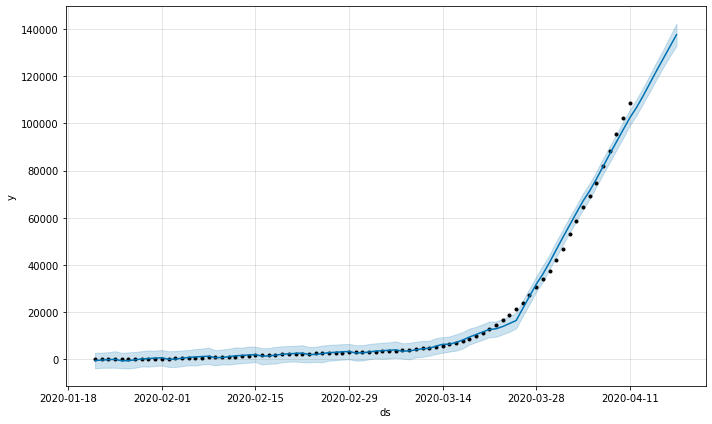

In [0]:
predict_with_prophet(deaths)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


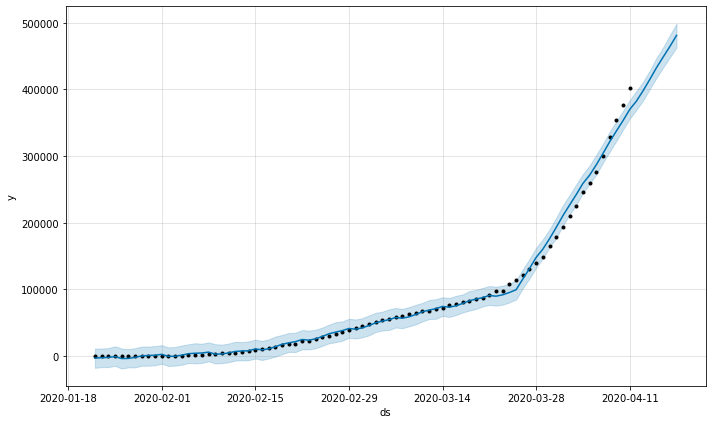

In [0]:
predict_with_prophet(recovered)

In [0]:
def predict_single_country_with_prophet(Country_name):
    def_temp = df_all.loc[df_all['Country/Region'] == Country_name]
    def_temp_by_date = def_temp.groupby('Date').sum().reset_index()

    confirmed = def_temp_by_date.groupby('Date').sum()['Confirmed'].reset_index()
    deaths = def_temp_by_date.groupby('Date').sum()['Deaths'].reset_index()
    recovered = def_temp_by_date.groupby('Date').sum()['Recovered'].reset_index()

    predict_with_prophet(confirmed)
    predict_with_prophet(deaths)
    predict_with_prophet(recovered)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


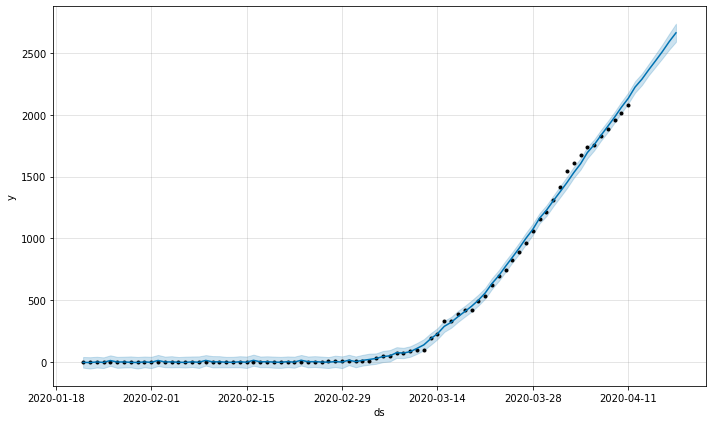

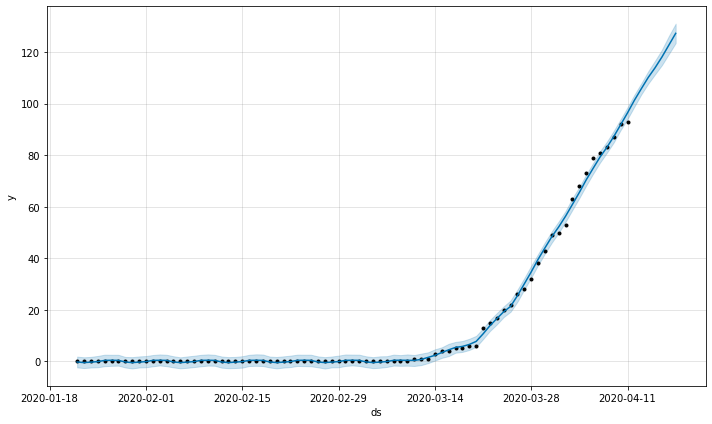

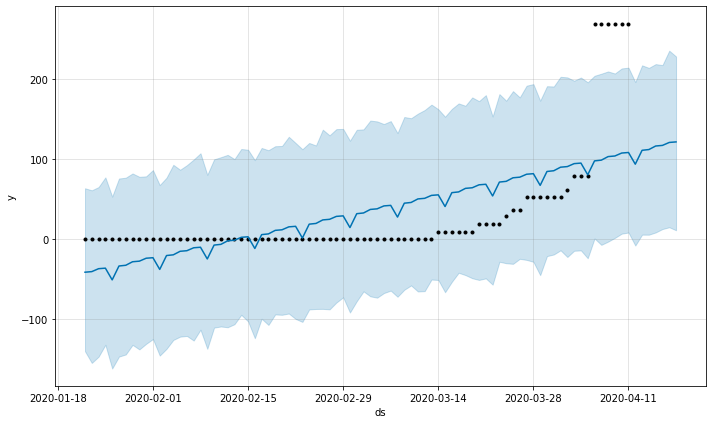

In [0]:
predict_single_country_with_prophet('Greece')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


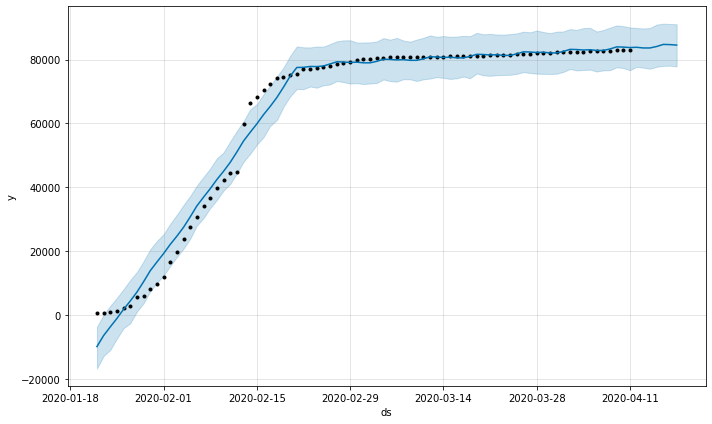

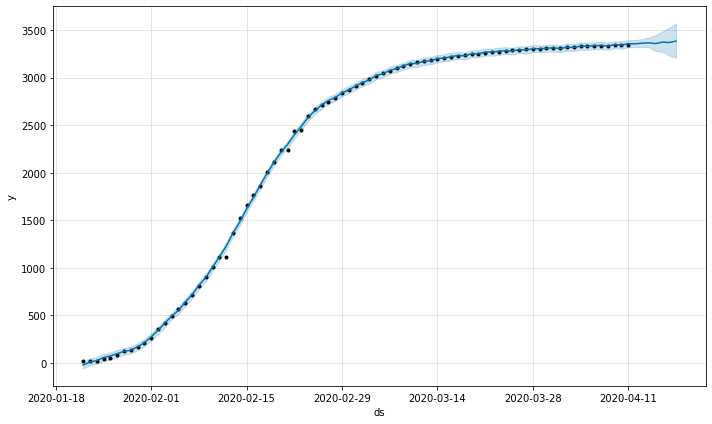

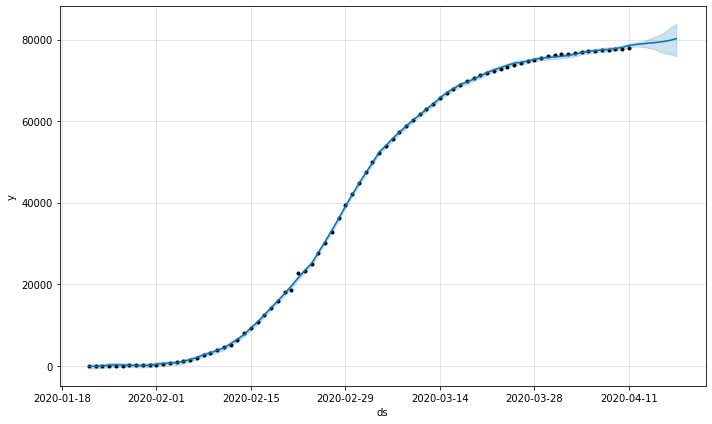

In [0]:
predict_single_country_with_prophet('China')

## 2.2 Predicting with LSTM ( Long short-term memory )


In this section we are using the number of new case for each day. \
Training our LSTM model from data except the last one. \
The last one is used to evaluate the model.

### 2.2.1 Preprosecing of Data

In [0]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Activation
from pandas import Series
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


In [0]:
df_all.head()

,Country/Region,Date,Confirmed,Recovered,Deaths
0,Afghanistan,1/22/20,0,0,0
1,Afghanistan,1/23/20,0,0,0
2,Afghanistan,1/24/20,0,0,0
3,Afghanistan,1/25/20,0,0,0
4,Afghanistan,1/26/20,0,0,0


In [0]:
df_all_by_date.head()

,Date,Confirmed,Recovered,Deaths
0,2020-01-22,555,28,17
1,2020-01-23,654,30,18
2,2020-01-24,941,36,26
3,2020-01-25,1434,39,42
4,2020-01-26,2118,52,56


In [0]:
covid19_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df_confirmed = pd.read_csv(covid19_confirmed, error_bad_lines=False)
df_confirmed.drop(['Province/State', 'Lat', 'Long'], axis=1, inplace=True)
df_confirmed = df_confirmed.groupby(['Country/Region']).sum().reset_index()
df_confirmed

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555
1,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433
2,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825
3,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601
4,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,4,7,16,16,19,26,30,30,31,35,38,38,39,41,44,47,48,52,59,59,59,84,91,98,109,116,119,134,161,194,217,237,254,261,263,263,267,268
181,Western Sahara,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4
182,Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
183,Zambia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,3,3,3,12,16,22,28,29,35,35,36,39,39,39,39,39,39,39,39,40,40


In [0]:
datesList = list(df_confirmed)[1:]
datesList = np.asarray(datesList)
datesList

array(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20',
       '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20',
       '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20',
       '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20',
       '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20',
       '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20',
       '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20',
       '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20',
       '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20',
       '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20', '4/2/20',
       '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20',
       '4/9/20', '4/10/20', '4/11/20'], dtype='<U7')

In [0]:
countriesList = np.asarray(df_confirmed.values.tolist())[: , :1]
dataArray = np.array(df_confirmed.values.tolist())[: , 1:]
print ('Data: ', dataArray.shape)
print ('Countries: ',countriesList.shape)
print ('Dates: ', datesList.shape)

dataArray = dataArray.astype(np.float)
dataArray

Data:  (185, 81)
Countries:  (185, 1)
Dates:  (81,)


array([[   0.,    0.,    0., ...,  484.,  521.,  555.],
       [   0.,    0.,    0., ...,  409.,  416.,  433.],
       [   0.,    0.,    0., ..., 1666., 1761., 1825.],
       ...,
       [   0.,    0.,    0., ...,    0.,    1.,    1.],
       [   0.,    0.,    0., ...,   39.,   40.,   40.],
       [   0.,    0.,    0., ...,   11.,   13.,   14.]])

In [0]:
DAYS_TO_PREDICT = 1
DAYS_IN_INPUT = dataArray[0].shape[0] - DAYS_TO_PREDICT

In [0]:
# rateOfChange returns an array that contains the difference between the current score 
# and the previous one. example:
# scores: [0.5845, -0.296, -0.0387, -0.1779, -0.4019, -0.5362, -0.6249, 0.69]
# diff : [0, -0.8805,0.2573,-0.1392,-0.1343,-0.0887,1.3149]

def rateOfChange(scores):
    scores = scores.tolist()
    tempArray =[]
    if len(scores)>1:
        prevValue = scores[0]
    else:
        tempArray.append(0.0)
        return tempArray
    diff = 0
    tempArray.append(diff)
    for i in range(1,len(scores)):
        # abs
        if scores[i] > prevValue:
            diff = abs(scores[i] - prevValue)
        else:
            diff = abs(scores[i] - prevValue) * (-1)
        tempArray.append(diff)
        prevValue = scores[i]
    tempArray = np.asarray(tempArray)
    return tempArray

In [0]:
newCasesPerDay =[]
for row in dataArray:
    diffArray = rateOfChange(row)
    newCasesPerDay.append(diffArray)
newCasesPerDay = np.asarray(newCasesPerDay)


In [0]:
newCasesPerDay[0]

array([ 0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0.,  1., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0.,  3., -0.,  1.,  2., -0., -0.,
        4.,  5.,  5.,  1., -0., -0.,  2., -0., 16., -0., 34., 10., 10.,
       16., -0., 10., 50.,  4., 63., 36.,  8., 18., 50., 18., 56., 21.,
       40., 37., 34.])

In [0]:
dataArray[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   4.,   4.,   5.,   7.,   7.,   7.,  11.,  16.,  21.,
        22.,  22.,  22.,  24.,  24.,  40.,  40.,  74.,  84.,  94., 110.,
       110., 120., 170., 174., 237., 273., 281., 299., 349., 367., 423.,
       444., 484., 521., 555.])

### 2.2.2 Building helpers functions for Testing Models

In [0]:
covid19_confirmed_test = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df_confirmed_test = pd.read_csv(covid19_confirmed_test, error_bad_lines=False)
df_confirmed_test.drop(['Province/State', 'Lat', 'Long'], axis=1, inplace=True)
df_confirmed_test = df_confirmed_test.groupby(['Country/Region']).sum().reset_index()

def rTestArrayOfCountry(countryName , fromIndx, toIndx):
  indexOdCountry = df_confirmed_test.index[df_confirmed_test['Country/Region'] == countryName]
  testArray = np.array(df_confirmed_test.values.tolist())[ indexOdCountry , 1: ]
  cuttedArray = testArray[0][fromIndx:toIndx]
  cuttedArray = cuttedArray.astype(np.float)
  return cuttedArray


In [0]:
rTestArrayOfCountry( 'Greece', -5, None) #Last 5 elements
rTestArrayOfCountry( 'Greece', 0, -1) # All except last on
rTestArrayOfCountry( 'Greece', -DAYS_IN_INPUT, None) # For predict the next day
rTestArrayOfCountry( 'Greece', -DAYS_IN_INPUT-DAYS_TO_PREDICT, -DAYS_TO_PREDICT) # For predict the current day


array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.,
          3.,    4.,    4.,    7.,    7.,    7.,    9.,   31.,   45.,
         46.,   73.,   73.,   89.,   99.,   99.,  190.,  228.,  331.,
        331.,  387.,  418.,  418.,  495.,  530.,  624.,  695.,  743.,
        821.,  892.,  966., 1061., 1156., 1212., 1314., 1415., 1544.,
       1613., 1673., 1735., 1755., 1832., 1884., 1955., 2011.])

In [0]:
## Predict test data
def predictt(testArray, model):
  scaler = MinMaxScaler()
  scaler.fit(testArray)
  scaledTestArray = scaler.transform(testArray)
  reshapedTestData = scaledTestArray.reshape((1, testArray.shape[0] , 1))
  #tensorTestData = tf.convert_to_tensor(reshapedTestData,dtype=tf.float32)
  scaledPrediction = model.predict(reshapedTestData, verbose=0)
  prediction = scaler.inverse_transform(scaledPrediction)
  return int(prediction[0][0])

In [0]:
def printPredictedTrueValues(country,model):
  testArrOfCountry = rTestArrayOfCountry(country, -DAYS_IN_INPUT-DAYS_TO_PREDICT, -DAYS_TO_PREDICT)
  newCasesPerDaySingleCountry = rateOfChange(testArrOfCountry.reshape((testArrOfCountry.shape[0])))
  newCasesPerDaySingleCountry = newCasesPerDaySingleCountry.reshape(newCasesPerDaySingleCountry.shape[0],1)
  predicted = predictt(newCasesPerDaySingleCountry, model)
  pastValues = rTestArrayOfCountry(country, -6, -DAYS_TO_PREDICT).reshape((5))
  trueValue = rTestArrayOfCountry(country, -1, None)[0]
  distance = abs(trueValue - (pastValues[-1] + predicted))
  print ("|%40s| Past values: %50s | True Value: %10d | Predicted: %10d | Distance: %10d |" % (country , str(pastValues.tolist()).strip('[]'), trueValue , pastValues[-1] + predicted , distance))


### 2.2.3 Predicting Solution via Simple LSTM

In [0]:
# step 1: Prepere data
scaler = MinMaxScaler()
scaler.fit(newCasesPerDay.T)
dataArrayScaled = scaler.transform(newCasesPerDay.T).T

# step 2: Split x data and y data
xData = np.asarray(dataArrayScaled[:,:-DAYS_TO_PREDICT])
yData = np.asarray(dataArrayScaled[:,-DAYS_TO_PREDICT:])
# step 3: Reshape data
xData = xData.reshape(xData.shape[0],xData.shape[1],1)
yData = yData.reshape(yData.shape[0])

# step 4: Create model
modelSimpleLSTM = Sequential()
modelSimpleLSTM.add(LSTM(50, activation='relu', input_shape=(DAYS_IN_INPUT, 1)))
modelSimpleLSTM.add(Dense(1))
modelSimpleLSTM.compile(optimizer='adam', loss='mse')
# step 5: Fit model
history = modelSimpleLSTM.fit(xData, yData, epochs=1000, validation_split=0.2, verbose=0)
loss = modelSimpleLSTM.evaluate(xData, yData, steps = xData.shape[0], verbose=0)
# step 6: Print Loss
print ('Loss: ', loss )

Loss:  0.0721326544880867


In [0]:
for country in countriesList:
  printPredictedTrueValues(country[0],modelSimpleLSTM)

|                             Afghanistan| Past values:                  367.0, 423.0, 444.0, 484.0, 521.0 | True Value:        555 | Predicted:        556 | Distance:          1 |
|                                 Albania| Past values:                  377.0, 383.0, 400.0, 409.0, 416.0 | True Value:        433 | Predicted:        428 | Distance:          5 |
|                                 Algeria| Past values:             1423.0, 1468.0, 1572.0, 1666.0, 1761.0 | True Value:       1825 | Predicted:       1854 | Distance:         29 |
|                                 Andorra| Past values:                  525.0, 545.0, 564.0, 583.0, 601.0 | True Value:        601 | Predicted:        620 | Distance:         19 |
|                                  Angola| Past values:                       16.0, 17.0, 19.0, 19.0, 19.0 | True Value:         19 | Predicted:         20 | Distance:          1 |
|                     Antigua and Barbuda| Past values:                       15.0, 19.0, 19.0,

### 2.2.4 Predicting Solution via Complex LSTM

In [0]:
# step 1: Prepere data
scaler = MinMaxScaler()
scaler.fit(newCasesPerDay.T)
dataArrayScaled = scaler.transform(newCasesPerDay.T).T

# step 2: Split x data and y data
xData = np.asarray(dataArrayScaled[:,:-DAYS_TO_PREDICT])
yData = np.asarray(dataArrayScaled[:,-DAYS_TO_PREDICT:])
# step 3: Reshape data
xData = xData.reshape(xData.shape[0],xData.shape[1],1)
yData = yData.reshape(yData.shape[0])

# step 4: Create model
modelComplexLSTM = Sequential()
modelComplexLSTM.add(LSTM(500, activation='relu', input_shape=(DAYS_IN_INPUT, 1)))
modelComplexLSTM.add(Dense(100))
modelComplexLSTM.add(Dense(100))
modelComplexLSTM.add(Dense(1))
modelComplexLSTM.compile(optimizer='adam', loss='mse')
# step 5: Fit model
history = modelComplexLSTM.fit(xData, yData, epochs=1000, validation_split=0.2, verbose=0)
loss = modelComplexLSTM.evaluate(xData, yData, steps = xData.shape[0], verbose=0)
# step 6: Print Loss
print ('Loss: ', loss )

Loss:  0.015773264691233635


In [0]:
for country in countriesList:
  printPredictedTrueValues(country[0],modelComplexLSTM)

|                             Afghanistan| Past values:                  367.0, 423.0, 444.0, 484.0, 521.0 | True Value:        555 | Predicted:        554 | Distance:          1 |
|                                 Albania| Past values:                  377.0, 383.0, 400.0, 409.0, 416.0 | True Value:        433 | Predicted:        433 | Distance:          0 |
|                                 Algeria| Past values:             1423.0, 1468.0, 1572.0, 1666.0, 1761.0 | True Value:       1825 | Predicted:       1824 | Distance:          1 |
|                                 Andorra| Past values:                  525.0, 545.0, 564.0, 583.0, 601.0 | True Value:        601 | Predicted:        601 | Distance:          0 |
|                                  Angola| Past values:                       16.0, 17.0, 19.0, 19.0, 19.0 | True Value:         19 | Predicted:         19 | Distance:          0 |
|                     Antigua and Barbuda| Past values:                       15.0, 19.0, 19.0,

### 2.2.5 Predicting Solution via Stacked LSTM

In [0]:
# step 1: Prepere data
scaler = MinMaxScaler()
scaler.fit(newCasesPerDay.T)
dataArrayScaled = scaler.transform(newCasesPerDay.T).T

# step 2: Split x data and y data
xData = np.asarray(dataArrayScaled[:,:-DAYS_TO_PREDICT])
yData = np.asarray(dataArrayScaled[:,-DAYS_TO_PREDICT:])
# step 3: Reshape data
xData = xData.reshape(xData.shape[0],xData.shape[1],1)
yData = yData.reshape(yData.shape[0])

# step 4: Create model
modelStackedLSTM = Sequential()
modelStackedLSTM.add(LSTM(200, activation='relu', return_sequences=True, input_shape=(DAYS_IN_INPUT, 1)))
modelStackedLSTM.add(LSTM(100, activation='relu', return_sequences=True))
modelStackedLSTM.add(LSTM(50, activation='relu', return_sequences=True))
modelStackedLSTM.add(LSTM(25, activation='relu'))
modelStackedLSTM.add(Dense(20, activation='relu'))
modelStackedLSTM.add(Dense(10, activation='relu'))
modelStackedLSTM.add(Dense(1))
modelStackedLSTM.compile(optimizer='adam', loss='mse')
# step 5: Fit model
history = modelStackedLSTM.fit(xData, yData, epochs=1000, validation_split=0.2, verbose=0)
loss = modelStackedLSTM.evaluate(xData, yData, steps = xData.shape[0], verbose=0)
# step 6: Print Loss
print ('Loss: ', loss )

Loss:  0.03987174481153488


In [0]:
for country in countriesList:
  printPredictedTrueValues(country[0],modelStackedLSTM)

|                             Afghanistan| Past values:                  367.0, 423.0, 444.0, 484.0, 521.0 | True Value:        555 | Predicted:        564 | Distance:          9 |
|                                 Albania| Past values:                  377.0, 383.0, 400.0, 409.0, 416.0 | True Value:        433 | Predicted:        428 | Distance:          5 |
|                                 Algeria| Past values:             1423.0, 1468.0, 1572.0, 1666.0, 1761.0 | True Value:       1825 | Predicted:       1833 | Distance:          8 |
|                                 Andorra| Past values:                  525.0, 545.0, 564.0, 583.0, 601.0 | True Value:        601 | Predicted:        611 | Distance:         10 |
|                                  Angola| Past values:                       16.0, 17.0, 19.0, 19.0, 19.0 | True Value:         19 | Predicted:         19 | Distance:          0 |
|                     Antigua and Barbuda| Past values:                       15.0, 19.0, 19.0,

# Appendix


## Predicting next day cases for each country

In [0]:
def predictNextDayCases( country, model):
  countryArray = rTestArrayOfCountry( country, -DAYS_IN_INPUT, None) # For predict the next day
  newCasesPerDaySingleCountry = rateOfChange(countryArray)
  newCasesPerDaySingleCountry = newCasesPerDaySingleCountry.reshape(countryArray.shape[0],1)
  scaler = MinMaxScaler()
  scaler.fit(newCasesPerDaySingleCountry)
  scaledTestArray = scaler.transform(newCasesPerDaySingleCountry)
  reshapedTestData = scaledTestArray.reshape((1, scaledTestArray.shape[0] , 1))
  scaledPrediction = model.predict(reshapedTestData, verbose=0)
  prediction = scaler.inverse_transform(scaledPrediction)
  return int(prediction[0][0])



In [0]:
dates = datesList[-3:]
dates = pd.to_datetime(dates)
next_date = dates[-1] + pd.DateOffset(days=1)
print ('-' * 173)
print ("|%40s| %30s | %30s | %30s | %30s |" % ( '' ,'Confirmed Cases', 'Confirmed Cases' , 'Confirmed Cases', ' Predicted New Cases'))
print ("|%40s| %30s | %30s | %30s | %30s |" % ( 'Country' ,'3 Days before', '2 Days before' , 'Yesterday', ' Today'))
print ("|%40s| %30s | %30s | %30s | %30s |" % ( '' , dates[0], dates[1] , dates[2], next_date))
print ('-' * 173)
for country in countriesList:
  pastValues = rTestArrayOfCountry(country[0], -3, None)
  predicted = predictNextDayCases(country[0] , modelSimpleLSTM)
  print ("|%40s| %30s | %30s | %30s | %30s |" % (country[0] , pastValues[0], pastValues[1], pastValues[2], predicted))
print ('-' * 173)


-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|                                        |                Confirmed Cases |                Confirmed Cases |                Confirmed Cases |            Predicted New Cases |
|                                 Country|                  3 Days before |                  2 Days before |                      Yesterday |                          Today |
|                                        |            2020-04-09 00:00:00 |            2020-04-10 00:00:00 |            2020-04-11 00:00:00 |            2020-04-12 00:00:00 |
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|                             Afghanistan|                          484.0 |                          521.0 |                   